# Helical Tail Dynamics

In [359]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Tail Geometry

Create parametric equations in Cylindrical Coordinates

In [360]:
def cylToCar(r, theta, z) -> tuple[list[float]]:
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x,y,z

In [361]:
r = 1
spirals = 6
l = 20
d_l = 1/10 # Start vertical Derivative
d_r = 1/50 # Start Radial Derivative
gamma = 4 # Ratio of start and end verical derivaties 

In [362]:
def plotTail(x,y,z) -> None:

    rect = [0, 0, 1, 1]

    fig1 = plt.figure(figsize=(12, 12), dpi=300)
    ax1 = fig1.add_axes(rect, projection="3d")
    ax1.plot(x,y,z, color='k')
    ax1.plot([0,1], [0,0], [0,0], 'r')
    ax1.plot([0,0], [0,1], [0,0], 'b')
    ax1.plot([0,0], [0,0], [0,1], 'g')
    ax1.set_box_aspect([1,1,z[-1]])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_zticks([])
    ax1.view_init(roll=-90, azim=45)
    ax1.grid(False)
    ax1.set_axis_off()

In [363]:
def buildTail(z1, zf2, dzf, r1, rf2, drf, l) -> tuple[list[float]]:
    li = 0
    step = 0.1
    s = [0]
    z = [0]
    r = [0]
    theta = [0]
    while (li < l):
        z.append(z1(s[-1]))
        r.append(r1(s[-1]))
        theta.append(s[-1])
        s.append(s[-1] + step)

        rn = [rf(x) for x in s]
        drn = [drf(x) for x in s]

        rn = np.array(rn)
        drn = np.array(drn)
        tot = [np.sqrt(x) for x in rn + drn]
        li = np.trapz(tot, s)

    s = np.array(s)
    r = np.array(r)
    theta = np.array(theta)
    z = np.array(z)
    x, y, z = cylToCar(r, theta, z)
    return x, y, z, s, r

Symetric Helix

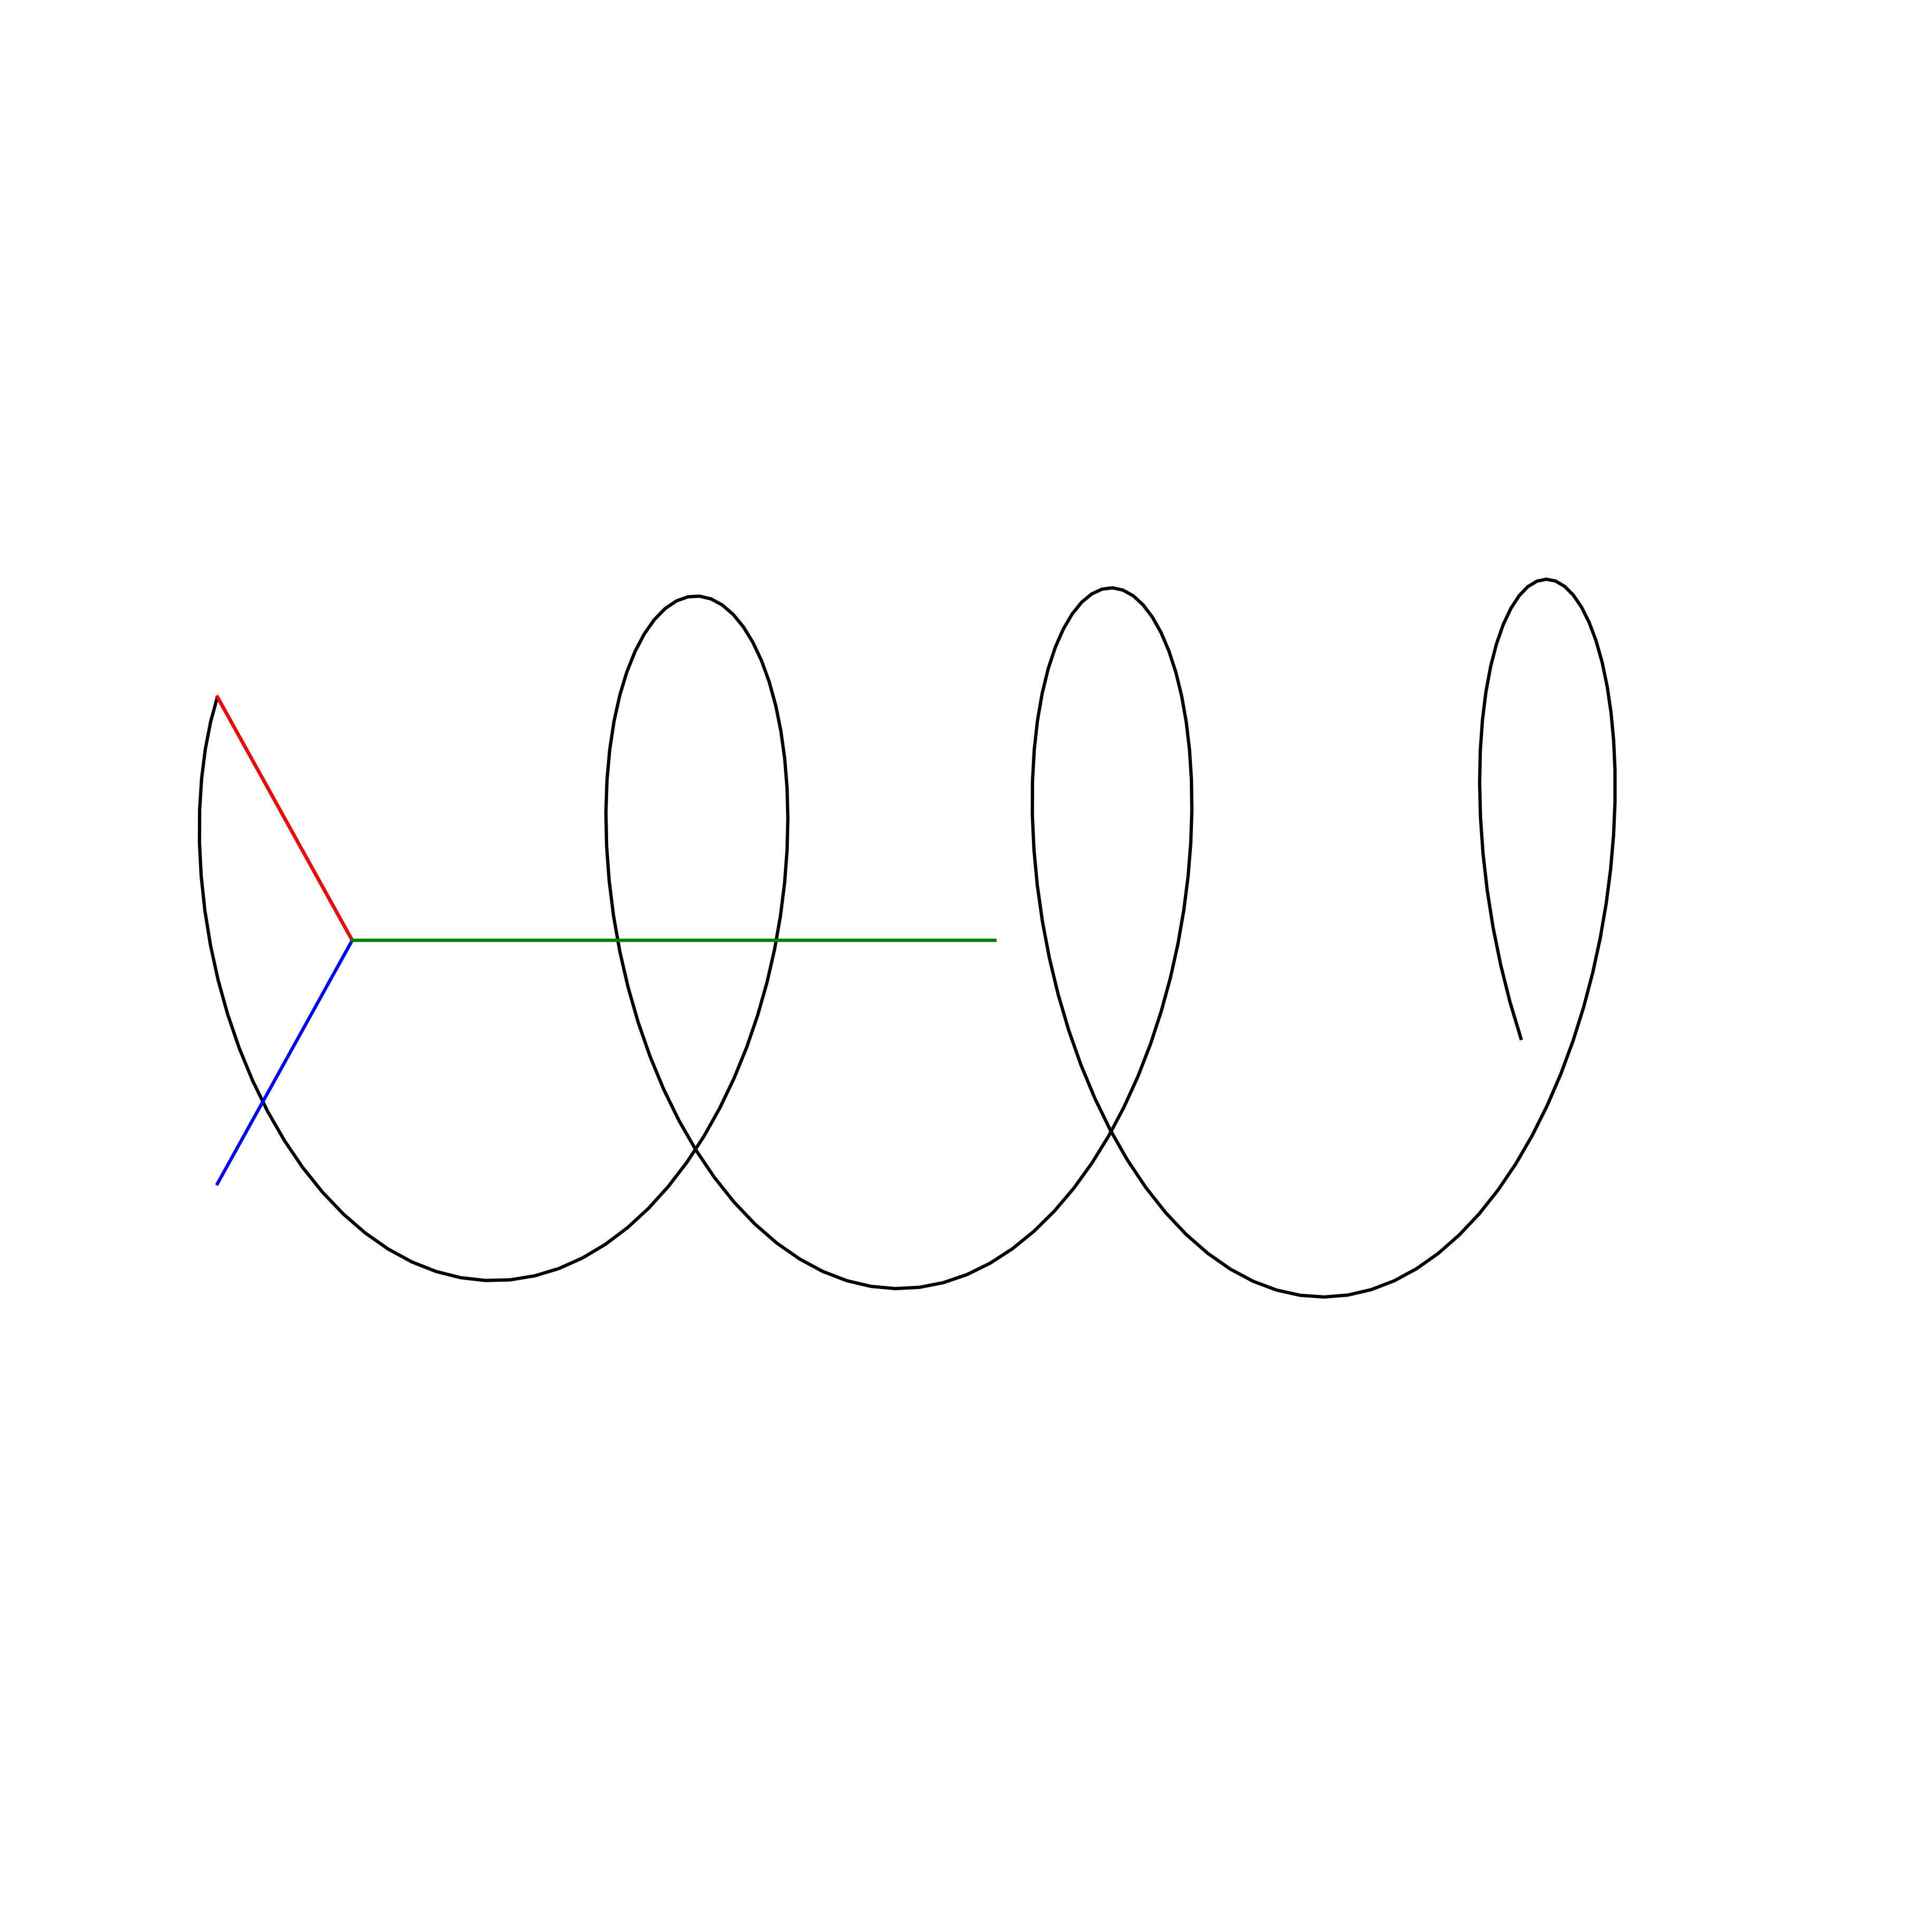

In [364]:
s = sp.symbols("s", real=True)

z0 = s * d_l
dz = sp.diff(z0, s)
zf = z0**2
dzf = dz**2
z0 = sp.lambdify(s, z0)
zf = sp.lambdify(s, zf)
dz0 = sp.lambdify(s, dz)
dzf = sp.lambdify(s, dzf)

r0 = r
dr = sp.diff(r0, s)
rf = r0**2
drf = dr**2
r0 = sp.lambdify(s, r0)
rf = sp.lambdify(s, rf)
dr = sp.lambdify(s, dr)
drf = sp.lambdify(s, drf)

x0, y0, z0, s0, r0 = buildTail(z0, zf, dzf, r0, rf, drf, l)
plotTail(x0,y0,z0)

Generated Tail (Cubic)

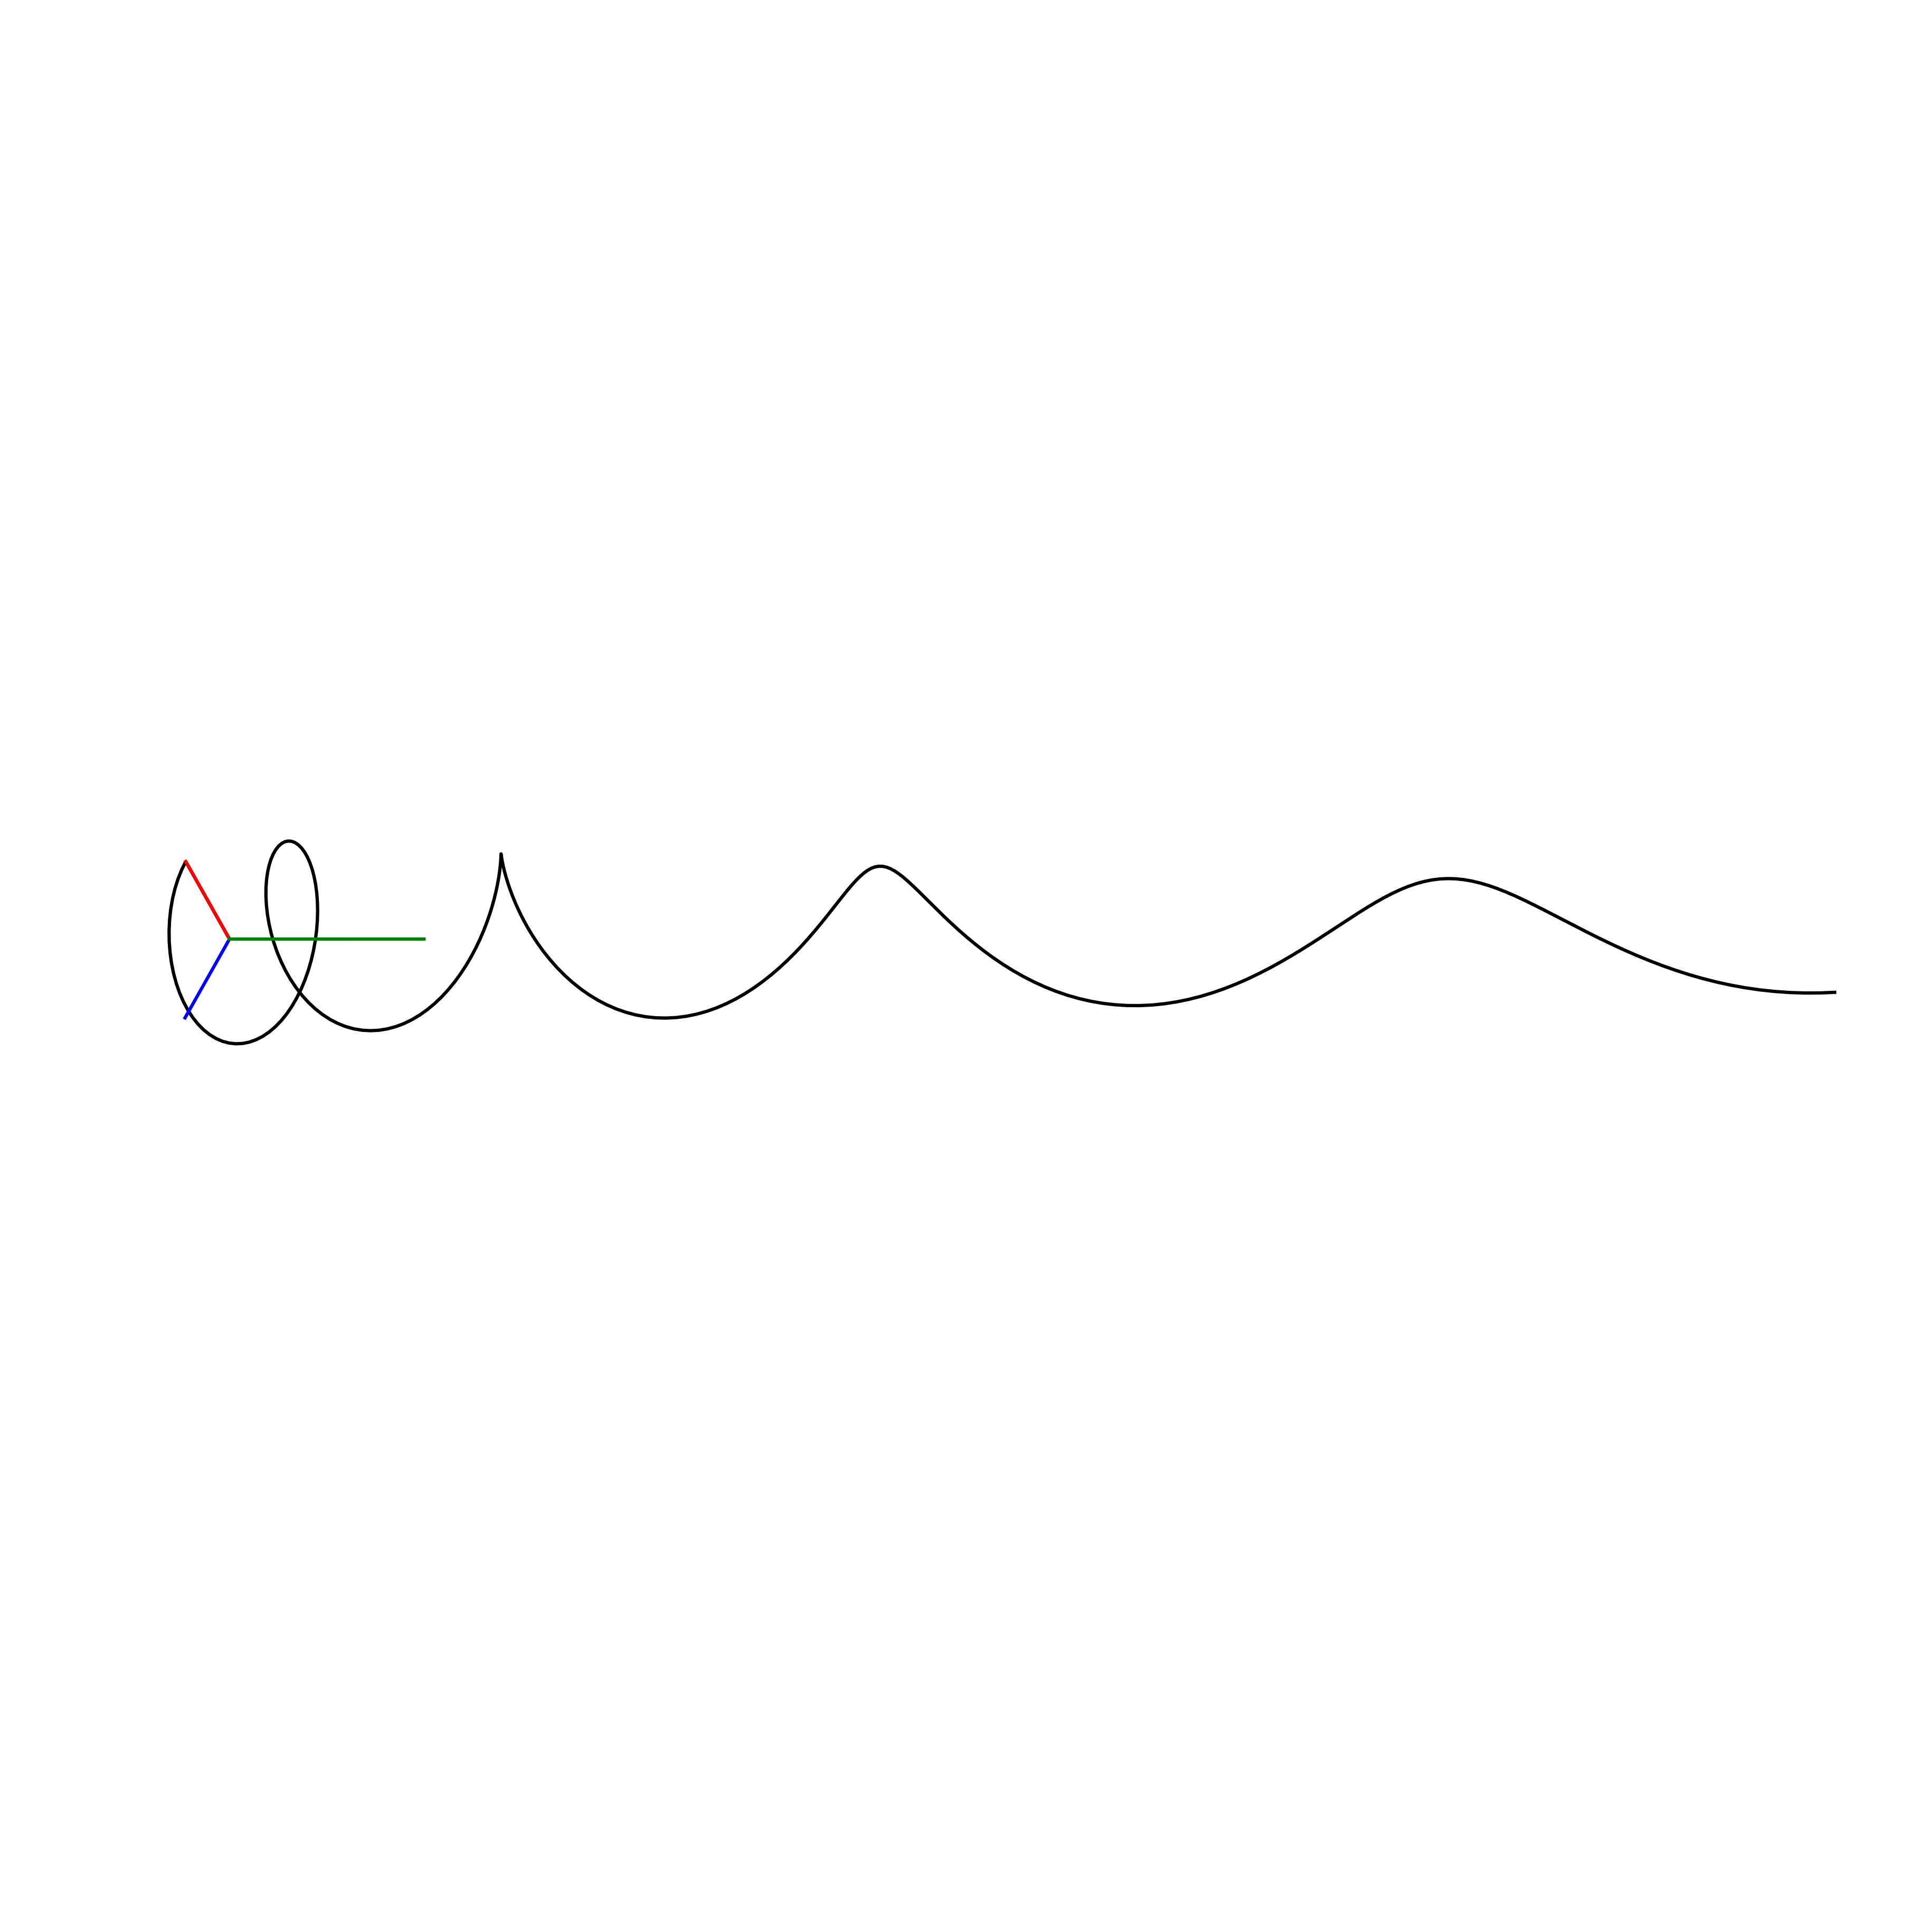

In [365]:
s = sp.symbols("s", real=True)

z1 = d_l * s**2 / 10
dz = sp.diff(z1, s)
zf = z1**2
dzf = dz**2
z1 = sp.lambdify(s, z1)
zf = sp.lambdify(s, zf)
dz1 = sp.lambdify(s, dz)
dzf = sp.lambdify(s, dzf)

r1 = r + - s * d_r
dr = sp.diff(r1, s)
rf = r1**2
drf = dr**2
r1 = sp.lambdify(s, r1)
rf = sp.lambdify(s, rf)
dr = sp.lambdify(s, dr)
drf = sp.lambdify(s, drf)

x1, y1, z1, s1, r1 = buildTail(z1, zf, dzf, r1, rf, drf, l)
plotTail(x1,y1,z1)

In [366]:
def plotFig(ax, x1, y1, color1, name1, x2, y2, color2, name2, yLabel, s0, s1, step) -> None:
    ax.plot(x1, y1, color1, label=name1)
    ax.plot(x2, y2, color2, label=name2)
    plt.legend()
    ax.set_ylabel(yLabel)
    ax.legend
    for x in np.arange(s0, s1+step, step):
        plt.axvline(x, color='gray', linestyle='--', linewidth=0.5)

Text(0.5, 0.98, 'Parametric Curves')

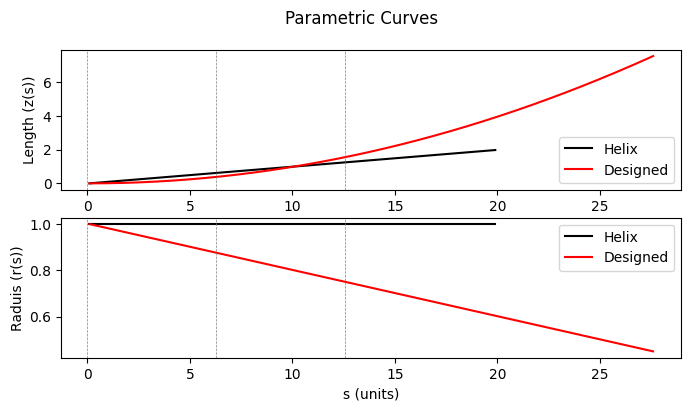

In [367]:
fig2 = plt.figure(figsize=(8,4))
ax2 = fig2.add_subplot(211)
plotFig(ax2, s0[1:-1], z0[1:-1], "k", "Helix", s1[1:-1], z1[1:-1], "r", "Designed", "Length (z(s))", 0, z1[-1], 2*np.pi)
ax2 = fig2.add_subplot(212)
plotFig(ax2, s0[1:-1], r0[1:-1], "k", "Helix", s1[1:-1], r1[1:-1], "r",  "Designed", "Raduis (r(s))", 0, z1[-1], 2*np.pi)
plt.xlabel("s (units)")
plt.suptitle("Parametric Curves")

## Tail Dynamics and Forces

Force Dyanmics

In [368]:
def calF(dz, r, s) -> tuple[list[float]]:
    omega = 1 # Unit Rotational Velocity
    
    dzs = [dz(x) for x in s]

    cos = np.cos(np.arctan(dzs))
    sin = np.sin(np.arctan(dzs))


    vParr = omega * r * cos
    vPerp = omega * r * sin

    FParr = - 2 * vParr
    FPerp = -1 * vPerp

    Fz = FParr*sin + FPerp*cos
    T = r * (FParr*cos + FPerp*sin)

    return Fz, T

In [371]:
F0, T0 = calF(dz0, r0, s0)
F1, T1 = calF(dz1, r1, s1)

Plotting Force

Text(0.5, 0.98, 'Forces along Tail Length')

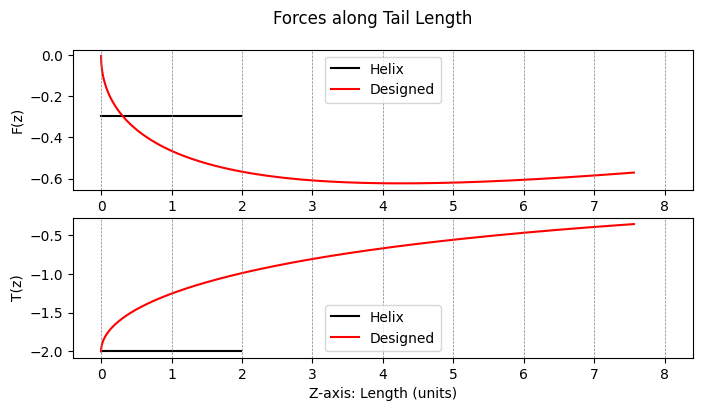

In [373]:
fig3 = plt.figure(figsize=(8,4))
ax3 = fig3.add_subplot(211)
plotFig(ax3, z0[1:-1], F0[1:-1], "k", "Helix", z1[1:-1], F1[1:-1], "r", "Designed", "F(z)", 0, z1[-1], 1)
ax3 = fig3.add_subplot(212)
plotFig(ax3, z0[1:-1], T0[1:-1], "k", "Helix", z1[1:-1], T1[1:-1], "r", "Designed", "T(z)", 0, z1[-1], 1)
plt.xlabel("Z-axis: Length (units)")
plt.suptitle("Forces along Tail Length")

In [375]:
sumFz0 = sum(F0)
display(sumFz0)

sumFz1 = sum(F1)
display(sumFz1)

-59.40594059405952

-129.30192588156407

In [377]:
sumT0 = sum(T0)
display(sumT0)

sumT1 = sum(T1)
display(sumT1)

-398.0198019801974

-295.7663634912969